In [1]:
import numpy as np
import pandas as pd
import gudhi as gd
from sklearn import manifold
from pylab import *
%matplotlib inline

C:\Users\Seungyun\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path_file = 'C:\\Users\\Seungyun\\CS\\TDA\\Basic\\Gudhi\\datasets\\Corr_ProteinBinding\\'
files_list = [
    '1anf.corr_1.txt', 
    '1ez9.corr_1.txt', 
    '1fqa.corr_2.txt', 
    '1fqb.corr_3.txt', 
    '1fqc.corr_2.txt', 
    '1fqd.corr_3.txt', 
    '1jw4.corr_4.txt', 
    '1jw5.corr_5.txt', 
    '1lls.corr_6.txt', 
    '1mpd.corr_4.txt', 
    '1omp.corr_7.txt', 
    '3hpi.corr_5.txt', 
    '3mbp.corr_6.txt', 
    '4mbp.corr_7.txt'
]

corr_list = [pd.read_csv(path_file + u,
                         header = None,
                         delim_whitespace = True) for u in files_list]

dist_list = [ 1- np.abs(c) for c in corr_list]

In [3]:
D0 = dist_list[0]

### Persistent barcodes and persistence diagram

In [4]:
skeleton_protein0 = gd.RipsComplex(
    distance_matrix = D0.values,
    max_edge_length = 0.8
)

Rips_simplex_tree_protein0 = skeleton_protein0.create_simplex_tree(max_dimension = 2)

In [5]:
Barcodes_Rips0 = Rips_simplex_tree_protein0.persistence()

In [6]:
for i in range(20):
    print(Barcodes_Rips0[i])

(1, (0.07963602000000003, 0.35798637))
(1, (0.12677510000000003, 0.39508646999999997))
(1, (0.26003449999999995, 0.5273952))
(1, (0.07943339999999999, 0.31429881000000004))
(1, (0.08248586999999996, 0.30429980999999995))
(1, (0.11378021999999999, 0.31171713999999995))
(1, (0.07726765000000002, 0.26078758))
(1, (0.09107215000000002, 0.25065161999999996))
(1, (0.0709843, 0.22765623000000001))
(1, (0.09347402000000005, 0.24999733000000002))
(1, (0.07013614000000001, 0.22504734000000004))
(1, (0.08752541000000003, 0.20355559))
(1, (0.21541215000000002, 0.32814707))
(1, (0.06835270000000004, 0.17527247))
(1, (0.08857625000000002, 0.19539684000000002))
(1, (0.08241111999999995, 0.18353136999999997))
(1, (0.10362273, 0.20264340000000003))
(1, (0.09289979999999998, 0.19181444000000003))
(1, (0.09581541999999998, 0.19310879999999997))
(1, (0.09541275000000005, 0.18175165000000004))


In [7]:
Rips_simplex_tree_protein0.persistence_intervals_in_dimension(0)

array([[0.        , 0.01498817],
       [0.        , 0.01614179],
       [0.        , 0.01618629],
       [0.        , 0.01964641],
       [0.        , 0.02002598],
       [0.        , 0.02019621],
       [0.        , 0.02128167],
       [0.        , 0.02139837],
       [0.        , 0.02189414],
       [0.        , 0.02211046],
       [0.        , 0.02279135],
       [0.        , 0.02305466],
       [0.        , 0.02376384],
       [0.        , 0.02398958],
       [0.        , 0.02427977],
       [0.        , 0.02431161],
       [0.        , 0.02514183],
       [0.        , 0.0252621 ],
       [0.        , 0.025566  ],
       [0.        , 0.02572414],
       [0.        , 0.02668906],
       [0.        , 0.02703624],
       [0.        , 0.02723942],
       [0.        , 0.02730715],
       [0.        , 0.02737215],
       [0.        , 0.02743006],
       [0.        , 0.02758413],
       [0.        , 0.02769299],
       [0.        , 0.0277112 ],
       [0.        , 0.02815389],
       [0.

C:\Users\Seungyun\anaconda3\lib\site-packages\gudhi\persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

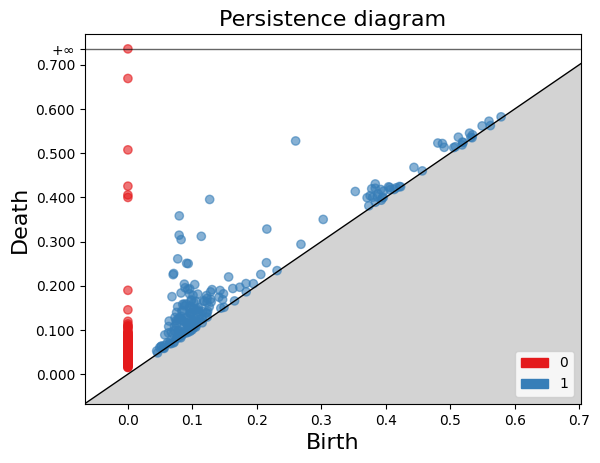

In [8]:
gd.plot_persistence_diagram(Barcodes_Rips0)

### Bottleneck distance

In [9]:
D1 = dist_list[1]

skeleton_protein1 = gd.RipsComplex(distance_matrix = D1.values, max_edge_length = 0.8)

Rips_simplex_tree_protein1 = skeleton_protein1.create_simplex_tree(max_dimension=2)

In [10]:
Barcodes_Rips1 = Rips_simplex_tree_protein1.persistence()

In [11]:
I0 = Rips_simplex_tree_protein0.persistence_intervals_in_dimension(1)
I1 = Rips_simplex_tree_protein1.persistence_intervals_in_dimension(1)

gd.bottleneck_distance(I0,I1)

0.05052142999999998

### MDS on the Nottleneck distances

In [12]:
persistence_list0 = []
persistence_list1 = []

i=0

for d in dist_list:
    print(i)
    rips_complex = gd.RipsComplex(distance_matrix = d.values, max_edge_length=0.8)
    simplex_tree=rips_complex.create_simplex_tree(max_dimension = 2)
    diag = simplex_tree.persistence()
    persistence_list0.append(simplex_tree.persistence_intervals_in_dimension(0))
    persistence_list1.append(simplex_tree.persistence_intervals_in_dimension(1))
    i=i+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [13]:
I = len(files_list)
B0 = np.zeros((I,I))
B1 = np.zeros((I,I))

In [14]:
for i in range(I):
    for j in range(i):
        B0[i,j] = gd.bottleneck_distance(persistence_list0[i], persistence_list0[j])
        B1[i,j] = gd.bottleneck_distance(persistence_list1[i], persistence_list1[j])

In [15]:
B0 = B0 +B0.transpose()
B1 = B1 + B1.transpose()

In [16]:
mds = manifold.MDS(
    n_components = 2,
    max_iter = 3000,
    eps = 1e-9,
    dissimilarity = 'precomputed',
    n_jobs =1
)
pos = mds.fit(B0).embedding_

C:\Users\Seungyun\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


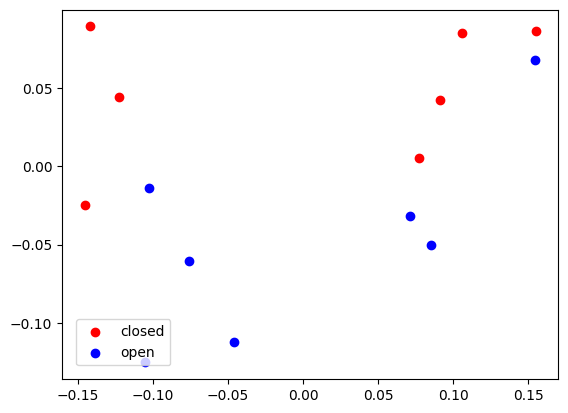

In [17]:
plt.scatter(pos[0:7,0], pos[0:7,1], color='red', label='closed')
plt.scatter(pos[7:I,0], pos[7:I,1], color='blue', label='open')
plt.legend(loc=3, borderaxespad=1)

In [18]:
pos = mds.fit(B1).embedding_

C:\Users\Seungyun\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


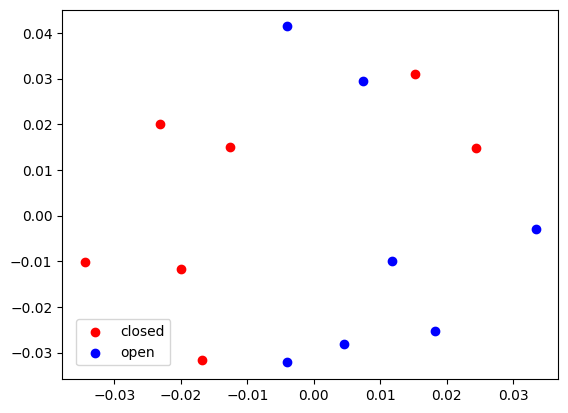

In [19]:
plt.scatter(pos[0:7,0], pos[0:7,1], color='red', label='closed')
plt.scatter(pos[7:I,0], pos[7:I,1], color='blue', label='open')
plt.legend(loc=3, borderaxespad=1)